<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Lista de Ejercicios




### Problema 1:  Raíces de ecuaciones



La siguiente fórmula nos describe la velocidad ascendente v de un cohete:

$$v(t)=uln\left(\frac{m}{m-qt}\right)-gt$$

Donde:

* u = módulo de la velocidad del combustible expulsado en relación con el cohete

* m = masa inicial del cohete (en t=0)

* g = módulo aceleración de la gravedad

* t = tiempo


Dado:

$$u= 950m/s,\quad m=2x10^5 kg, \quad q=3x10^3 kg/s, \quad g=9.8m/s^2, \quad t \in [10,25]$$

a) Defina y utilice 3 métodos para hallar el tiempo que tarda el cohete en alcanzar la velocidad de 500 m/s.

b) Resuelva analíticamente y compare resultados con los 3 métodos utilizados.

c) Elabore gráficas y detalle su análisis.

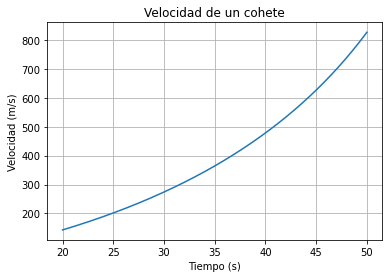

Según método de Newton, el cohete alcanza la velocidad de 500m/s en el tiempo 40.81587186850039s
Según método secante, el cohete alcanza la velocidad de 500m/s en el tiempo 40.81587186850038s
Según método de bisección, el cohete alcanza la velocidad de 500m/s en el tiempo 40.81587186845354s


In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = 950 #m/s
m = 2E5 #kg
q = 3E3 #kg/s
g = 9.8 #m/s^2

def v(t):
    return  u*np.log(m/(m-q*t))-g*t

def f(t):
    # esta es la función v(t)-500, porque queremos encontrar la raíz, i.e. el tiempo t* tal que v(t*)-500=0 o bien
    # v(t*)=500.
    return v(t)-500
#graficamos y notamos que la raíz está aproximadamente en t=40

t_plot = np.linspace(20,50,500)
plt.plot(t_plot,v(t_plot))
plt.grid(True)
plt.title('Velocidad de un cohete')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.show()


def dfdt(t):
    h = 1E-5
    return (f(t+h/2)-f(t-h/2))/h #diferencia central

# Cuando se alcance la precisión, los programas se detienen
accuracy = 1E-10

# Método de Newton
def newton_method(t):
    delta = 1.0
    while abs(delta) > accuracy:
        delta = f(t)/dfdt(t)
        t -= delta
    return t

t_newton = newton_method(40)
print(f"Según método de Newton, el cohete alcanza la velocidad de 500m/s en el tiempo {t_newton}s")

#método secante
def secant_method(t,t0):
    delta = 1.0
    while abs(delta) > accuracy:
        dfdt = (f(t)-f(t0))/(t-t0)
        delta = f(t)/dfdt
        t0 = t
        t -= delta
    return t

t_secant = secant_method(30,60)
print(f"Según método secante, el cohete alcanza la velocidad de 500m/s en el tiempo {t_secant}s")


# bisección
def biseccion(f, t1,t2,accuracy): #f(t1) y f(t2) deben tener signos distintos
    while abs(t1-t2) > accuracy:
        t = (t1+t2)/2
        if np.sign(f(t))==np.sign(f(t1)):
            t1 = t
        elif np.sign(f(t))==np.sign(f(t2)):
            t2 = t
    return t

t_bisec = biseccion(f,30,60,accuracy)
print(f"Según método de bisección, el cohete alcanza la velocidad de 500m/s en el tiempo {t_bisec}s")

## Analíticamente, de acuerdo con Mathematica, el resultado es t=40.8159 s, de manera que las soluciones aquí dadas se aproximan bastante.
## Hacer el valor de la precisión (accuracy) más pequeño puede ayudar a encontrar soluciones más cercanas, aunque estas son bastante buenas.


Me tomé la libertad de escribir mis propios programas (con ayuda del libro de Mark Newman "Computational Physics") para practicar un poco e investigar más a fondo las ventajas y desventajas de cada uno de estos métodos.

Analíticamente, de acuerdo con Mathematica, el resultado es $t=40.8159 s$, de manera que las soluciones aquí dadas se aproximan bastante.
Hacer el valor de la precisión (accuracy) más pequeño puede ayudar a encontrar soluciones más cercanas, aunque estas son bastante buenas.
Lo que hicimos fue definir la función $f(t)=v(t)-500$ y hallar la raíz mínimo, ya que esto da el tiempo $t_0$ tal que $f(t_0)=v(t_0)-500=0$, o bien, $v(t_0)=500$, que es lo que queremos (ignoro unidades por simplicidad).

El método de bisección (o búsqueda binaria), aquí utilizado, es un método robusto. Uno específica un intervalo en el que desea encontrar la solución a una ecuación. En este caso tuvimos que graficar para saber grosso modo en qué región se encuentra dicha solución. Supongámos que nuestros puntos iniciales $t_1$ y $t_2$ se encuentran a una distancia $\delta$; la distancia se disminuye a la mitad a cada paso de la búsqueda binaria, por lo que después de $N$ pasos, la distancia es $\delta/2^N$. Si tenemos, por ejemplo, puntos a una distancia inicial de $\delta=10^{10}$ con una precisión de $10^{-10}$, el número de pasos necesario para encontrar la raíz es $67$, que no requiere mucho tiempo de cómputo. Este método tiene sus desventajas, por ejemplo, si entre los puntos iniciales hay un número par de raíces. Por otro lado, a veces no es posible graficar para buscar un punto que a grosso modo sea cercano a la solución.

El método de Newton requiere un solo valor inicial. Basado en este valor, usa la pendiente en esa posición para extrapolar y hallar un segundo punto que usualmente será más cercano a la solución que el primero (si uno tiene mala suerte, puede que sea más lejano). El método de Newton tiene converfencia cuadrática, lo que implica que converge extremadamente rápido. Las desventajas son que requiere que conozcamos la derivada de la función (podemos usar derivación numérica) y que no siempre converge (esto depende del valor de la derivada).

El método de la secante arregla algunos problemas que se tienen en el de Newton, pues si no conocemos la derivada simplemente podemos calcularla numéricamente usando la secante (diferencia finita) en lugar de la tangente (derivada). Son formas similares; el método de la secante también converge con rapidez y tiene las mismas desventajas. También puede generalizarse a la solución de ecuaciones simultáneas no lineales, aunque la generalización puede ser complicada.

### Problema 2: Interpolación

Dadas las funciones:

1. $f (x) = sin(x^2) $

2. $f (x) = e^{sin (x)}$

3. $f (x) = \frac{0.2}{(x-3.2)^2 + 0.04}$

a) Estudiar el error en dos métodos de interpolación (de su elección) con 10,20 y 50 datos (uniformemente distribuidos) en el intervalo [0.0, 5.0] y compare los resultados.

b) Hallar los órdenes de convergencia, elabore su gráfico con el eje x en base 2 y detallar su análisis.

c) Añade una perturbación sinusoidal ($\delta g(x)=sin(x)$) del orden de $10^{-4},10^{-5}, 10^{-6}$ con distribución homogénea, grafice y detalle su análisis, ¿cuál es el error que generan con respecto a aproximación hecha en "2.a)"?

In [2]:
# import numpy as np
# import numpy.polynomial.polynomial as poly
# import matplotlib.pyplot as plt
# import sympy as sym

# # Interpolacion de Lagrange
# def f1(x):
#   return np.sin(x**2)

# def f2(x):
#   return np.exp(np.sin(x))

# def f3(x):
#   return 0.2/((x-3.2)**2+0.04)

# def lagrange(f,n):
#   # n es número de puntos y f la función
#   xi = np.linspace(0.0,5.0,n)
#   fi = f(xi)
#   # PROCEDIMIENTO

#   n = len(xi)
#   x = sym.Symbol('x') #variable simbólica
#   polinomio = 0
#   divisorL = np.zeros(n, dtype = float)

#   for i in range(0,n,1):
#       # Termino de Lagrange
#       numerador = 1
#       denominador = 1
#       for j  in range(0,n,1):
#           if (j!=i):
#               numerador = numerador*(x-xi[j])
#               denominador = denominador*(xi[i]-xi[j])
#       terminoLi = numerador/denominador

#       polinomio = polinomio + terminoLi*fi[i]
#       divisorL[i] = denominador

#   # simplifica el polinomio
#   #Dado un polinomio, expand() lo pondrá en una forma canónica de una suma de monomios.
#   polisimple = polinomio.expand()

#   # para evaluación numérica
#   px = sym.lambdify(x,polisimple)

#   # Puntos para la gráfica
#   muestras = 101
#   a = np.min(xi)
#   b = np.max(xi)
#   pxi = np.linspace(a,b,muestras)
#   pfi = px(pxi)

#   # SALIDA
#   print(f'Polinomio de Lagrange para función {f.__name__} con {n} datos: ') 
#   print(polisimple)

#   # Gráfica
#   plt.plot(xi,fi,'o', label = 'Puntos')
#   plt.plot(pxi,pfi, label = 'Polinomio')
#   plt.legend()
#   plt.xlabel('xi')
#   plt.ylabel('fi')
#   plt.grid()
#   plt.title('Interpolación Lagrange')
#   plt.show()

# for n in [10,20,50]:
#   for func in [f1,f2,f3]:
#     lagrange(func,n)

### Problema 3: Derivación numérica

En 1928, George Gamow propuso una teoría muy exitosa del decaímiento $\alpha$, según la cual la partícula $α$ se mueve libremente dentro del núcleo y se emite después de atravesar la barrera potencial entre ella y el núcleo hijo. En otras palabras, la partícula $α$, de carga $Z_2$, cuya energía es $E$, está atrapada en un pozo potencial de radio R por la barrera potencial:

$$V(r)=\frac{Z_1Z_2e^2}{4\pi\epsilon_0 r}$$

para $r>R$.

$Z_1 =Z-2, \quad Z_2=2$, donde Z es la carga del núcleo de radio R.

$r$: es el radio fuera del núcleo ($r>R$ y con A, número de masa) donde:

$$R = 1.5\times 10^{-15}\,A^{1/3}\,{\rm m}=2.0\times 10^{-15}\,Z_1^{\,1/3}\,{\rm m}$$

a) Calcule la fuerza que experimenta la partícula y analice $\alpha$ para $r\in [R,3R]$, utilizando los tres esquemas de diferencias finitas.

b) Comparar los esquemas con la solución analítica, calcular los errores, órdenes de convergencia y detallar su análisis.

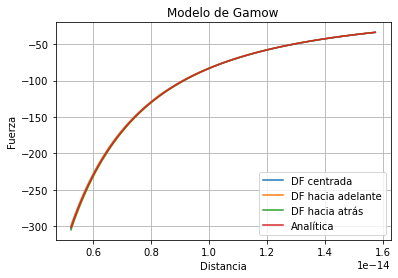

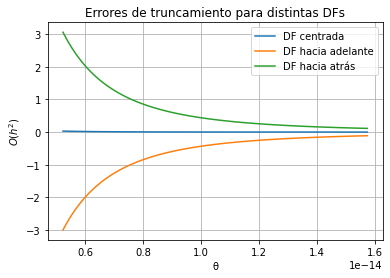

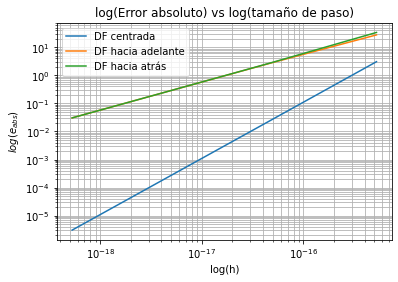

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema internacional
epsilon0 = 8.85418782E-12
e = 1.60217662E-19

Z = 20 # Número de protones
Z2 = 2
Z1 = Z-2
R = 2E-15*Z1**(1/3)
N = 2
h0 = R*1*10**(-N)
# Este valor de h0 quiere decir que por cada valor de r,
# para evaluar la derivada estudiaremos dicho valor +
# 1/10^n del valor de R

def V(r):
    return Z1*Z2*e**2/(4*np.pi*epsilon0*r)

def derivative(f,a,method='centrada',h=h0):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atrás':
        return (f(a) - f(a - h))/h 
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

# Derivada analítica de potencial V para calcular los errores
def DV(r):
    return -Z1*Z2*e**2/(4*np.pi*epsilon0*r**2)

# Nuestro dominio va de R a 3R
r = np.linspace(R,3*R,100)
DV_c = derivative(V,r)
DV_ad = derivative(V,r,method='adelante')
DV_at = derivative(V,r,method='atrás')

plt.plot(r,DV_c) 
plt.plot(r,DV_ad)
plt.plot(r,DV_at)
plt.plot(r,DV(r)) 
plt.legend(['DF centrada','DF hacia adelante','DF hacia atrás','Analítica'])
plt.title('Modelo de Gamow')
plt.ylabel('Fuerza')
plt.xlabel('Distancia')
plt.grid()
plt.show()

# Calculamos errores comparando derivada real y derivadas numéricas
c_err = DV(r)-DV_c
ad_err = DV(r)-DV_ad
at_err = DV(r)-DV_at

plt.plot(r,c_err) 
plt.plot(r,ad_err)
plt.plot(r,at_err)
plt.legend(['DF centrada','DF hacia adelante','DF hacia atrás'])
plt.title('Errores de truncamiento para distintas DFs')
plt.ylabel('$O(h^2)$')
plt.xlabel('θ')
plt.grid()
plt.show()


h_l=[] #lista de tamaños de pasos
errc_l=[] 
errad_l=[]
errat_l=[]
for i in range(10,10000,100):
  a = R
  b = 3*R 
  h = 1/i*R #tamaño del paso 
  N = round((b-a)/h) #redondear el resultado, el cual será la cantidad de datos
  r = np.linspace(a,b,N)
  DV_c=derivative(V,r, h=h)
  DV_ad=derivative(V,r, h=h,method='adelante')
  DV_at=derivative(V,r, h=h,method='atrás')
  #tomamos los máximos errores máximos por iteración sobre el dominio [a,b] 
  c_err=np.max(np.abs(DV(r)-DV_c))
  ad_err=np.max(np.abs(DV(r)-DV_ad))
  at_err=np.max(np.abs(DV(r)-DV_at))

  errc_l.append(c_err)
  errad_l.append(ad_err)
  errat_l.append(at_err)
  h_l.append(h)

plt.loglog(h_l,errc_l)
plt.loglog(h_l,errad_l)
plt.loglog(h_l,errat_l)

plt.legend(['DF centrada','DF hacia adelante','DF hacia atrás'])
plt.title('log(Error absoluto) vs log(tamaño de paso)')
plt.xlabel('log(h)')
plt.ylabel('$log(e_{abs})$')
plt.grid(True, which="both", ls="-")
plt.show()

La diferencia central es similar a la diferencia hacia atrás y hacia adelante salvo por el hecho de que los dos puntos están posicionados simétricamente alrededor del valor del cual queremos conocer la derivada. El método de derivada central es tanto más adecuado. Por ejemplo, si $f(x)$ y $f'''(x)$ son del orden de la unidad, el valor ideal de $h$ será típicamente de $10^{-5}$, pero el error mismo será del orden de $10^{-10}$, bastante bueno para la mayoría de nuestros propósitos. Este comportamiento se observa en las gráficas: para el mismo valor de $h$ los órdenes de convergencia para la diferencia hacia atrás y hacia adelante son prácticamente iguales, pero para la diferencia central es, en el peor de los casos, un par de órdenes de magnitud mejor. Claro que una aproximación a orden superior en Taylor daría mejores resultados, pero ya que buscamos un balance entre precisión y tiempo de cómputo, una diferencia central es el mejor acercamiento a este orden. Es evidente que cuando $h$ es grande, ambos métodos fallarán bastante. Lo importante es notar cómo la diferencia central es una mejor elección independientemente del valor de $h$. En la gráfica de los errores de truncamiento observamos que para valores grandes de $r$ los tres métodos son buenos; sin embargo, cuando $r$ es cercano a $R$, los métodos de diferencia hacia atrás y hacia adelante muestran errores de orden cuadrático relativamente grandes. Esto puede ser más evidente en otras funciones y, como se ve en este caso, principalmente cerca de divergencias.

### Problema 4: Integración numérica

La carga a partir de la densidad radial de carga lineal, $\lambda$, sobre el área de la sección transversal del cilindro, está definida por:

$$q_{total}=\int_A \lambda(r)dA(r)$$

donde, dA es el diferencial de área de la base del cilindro:

$$q_{total}=\int_A \lambda(r)(2\pi r dr)$$

Sabemos que la densidad tiene la forma:

$$\lambda(r)=\lambda_0 \left(1-\frac{r^2}{a^2} \right)$$

Y el campo eléctrico:

$$\vec{E}=\frac{kq_{total}}{d^2}\hat r$$

d: distancia de la superficie al espacio a evaluar el campo eléctrico. ($d\gt r$)


a) Determina la distribución de la carga y campo eléctrico (a distancias $d \in \{ r+r/4,r+r/2\}$ ) en función al radio utilizando 3 métodos de integración.

b) Obtener la solución analítica, comparar los errores de distintos métodos y detallar análisis.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

l_0 = 1
k = 1
a = 1 # radio del cilindro
# Hago 1 estos valores ya que no los proporcionaron
x1 = 0 # límites de integración desde 0 hasta el radio del cilindro
x2 = a # que elegimos como 1

def l(r):
    return l_0*(1-r**2/a**2)

# Integrando
def f(r):
    return l(r)*2*np.pi*r

#montecarlo
def montecarlo(f,b):
    n = 100 #número de subintervalos del intervalo [a, b]
    N = 100 #número de muestras
    x = np.zeros(n+1) #valores de x
    h = (x2-x1)/n #tamaño del paso
    total = 0
    random.seed(55)
    for i in range(n):
        x[i+1] = x[i] + h #actualizando el valor de x
        f_mean = 0 #initialización
        for k in range(N): 
            x_k = random.uniform(x[i],x[i+1]) #número aleatorio dentro del subintervalo
            f_mean += f(x_k) 
        sub_area = (h/N)*f_mean #promedio para el sub-intervalo
        total += sub_area #promedio del intervalo
    return total

# método del trapezoide
def int_trapezoide(f,n,x2):
    N = 2**(n-1) # num de divisiones
    h = (x2-x1)/N # tamaño de divisiones
    if n == 1:
        return 0.5*h*(f(x1)+f(x2))
    else:
        I = 1/2*int_trapezoide(f,n-1,x2)
        for k in range(1,N,2):
            I += h*f(x1+k*h)
        return I

# método de simpson
def int_simpson(f,n,x2):
    N = 2**(n-1) #num de divisiones
    h = (x2-x1)/N #tamaño de las divisiones
    def t(n):        
        N = 2**(n-1)
        h = (x2-x1)/N #tamaño de las divisiones
        t = 0
        for k in range(1,N,2):
            t += 2/3*f(x1+k*h)
        return t
    def s(n):
        if n == 1:
            return 1/3*(f(x1)+f(x2))
        else:
            return s(n-1)+t(n-1)
    return h*(s(n)+2*t(n))

# tomamos k=1 y el radio del cilindro como r=1
def E_1(d,method):
    if method == 'trapezoide':
        dist_carga = int_trapezoide(f,8,x2)
    elif method == 'simpson':
        dist_carga = int_simpson(f,8,x2)
    elif method == 'montecarlo':
        dist_carga = montecarlo(f,x2)
    return k*dist_carga/d**2

print(f'La carga segun método trapezoide es {int_trapezoide(f,8,x2)}')
print(f'La carga segun método simpson es {int_simpson(f,8,x2)}')
print(f'La carga segun método montecarlo es {montecarlo(f,x2)}\n')


# No entendí muy bien pero supongo que aquí se refieren a que 
# r es el radio del cilindro?

# Distancia
d = [1+1/4,1+1/2]
# Sol analítica para distancia 1 y distancia 2
sol_analitica = [1.00531,0.698132]
for method in ['trapezoide','simpson','montecarlo']:
  for i,val in enumerate(d):
        print(f'El campo elécrico a una distancia {val} del origen es {E_1(val,method)} usando el método {method}')
        print (f'Error = 1-sol. obtenida/sol.analítica={abs(1-E_1(val,method)/sol_analitica[i])}\n')

La carga segun método trapezoide es 1.5707004529956536
La carga segun método simpson es 1.5707963267948963
La carga segun método montecarlo es 1.57089292714826

El campo elécrico a una distancia 1.25 del origen es 1.0052482899172184 usando el método trapezoide
Error = 1-sol. obtenida/sol.analítica=6.138413303513612e-05

El campo elécrico a una distancia 1.5 del origen es 0.6980890902202905 usando el método trapezoide
Error = 1-sol. obtenida/sol.analítica=6.146370558779424e-05

El campo elécrico a una distancia 1.25 del origen es 1.0053096491487337 usando el método simpson
Error = 1-sol. obtenida/sol.analítica=3.489980864301856e-07

El campo elécrico a una distancia 1.5 del origen es 0.6981317007977317 usando el método simpson
Error = 1-sol. obtenida/sol.analítica=4.285754962030097e-07

El campo elécrico a una distancia 1.25 del origen es 1.0053714733748864 usando el método montecarlo
Error = 1-sol. obtenida/sol.analítica=6.114867542006408e-05

El campo elécrico a una distancia 1.5 del 

La regla del trapezoide permite calcular integrales aproximando las funciones a orden lineal en intervalos pequeños (en este caso definidos por la distancia $h$). Esto explica su nombre. Es una aproximación no muy buena porque para funciones que cambian rápidamente en intervalos pequeños puede dar errores grandes. El método de Simpson, por su parte, simplemente mejora esta idea al considerar funciones cuadráticas y no sólo lineales entre los intervalos definidos por el programa. En ambos casos se puede hacer el cálculo más preciso al incrementar el número de divisiones. Comparando los programas arriba vemos que el método de Simpson es ligeramente más complicado que la regla del trapezoide, pero no por mucho.

Ha de tenerse en cuenta que nuestras integrales son sólo aproximaciones. En primer lugar, está un error de redondeo; sin embargo, es más importante el error de aproximación.  El error de la regla del trapezoide lo da la fórmula de Euler-Maclaurin, que es de orden cuadrático (y el siguiente orden es cuádrico porque los términos con $h^3$ se cancelan). Hay poco interés en hacer $h$ tan pequeño que el error de aproximación se vuelva despreciable a comparación del error de redondeo; esto sólo hace lento al programa sin mejorar la precisión. Es por eso que tenemos que ser cuidadosos al escoger $h$. Para la regla de Simspon, se llega a que el error es del orden de $h^4$, que es significativamente mejor que el caso del trapezoide. Hay casos aislados en los que la regla del trapezoide puede ser mejor que la de Simpson, por lo que es útil conocer ambos métodos.

El método de Monte Carlo, por su parte, utiliza el concepto de aleatoriedad. Se toma un punto al azar, que puede caer por debajo o por encima de la curva. Si se hace esto con muchos puntos (digamos $N$) y $k$ de ellos caen debajo de la curva dentro de un rectángulo de área $A$, la integral queda aproximada por $I \approx kA/N$. La principal desventaja de Monte Carlo es que no da resultados muy precisos, pues requiere un gran poder computaacional para ello. Sin embargo, es útil en funciones patológicas en las que aproximar a orden lineal o cuadrático no da ninguna ventaja. Para ser más específicos, el error varía con $N$ como $N^{1/2}$, de modo que la tasa de convergencia es bastante baja.

Para este caso particular ya que es una función sencilla de integrar, vemos que con poco esfuerzo (i.e. pocos pasos para cada método) se llegan a resultados prácticamente iguales al analítico y entre sí. (El integrando va como $r-r^3/a^2$.) El error es más pequeño para el método Simpson —orden $10^{-7}$—, como es de esperarse por lo ya argumentado. Los errores de la regla del trapezoide y Monte Carlo son bastante similares —orden $10^{-5}$—.

### Problema 5:

Considerar un aro horizontal sin rozamiento de radio R. En este aro enhebro tres objetos con masas idénticas m, y, entre los objetos, tres muelles idénticos, cada uno con una masa constante de fuerza k.

<p align="center">
  <img src="https://habrastorage.org/webt/nz/qz/g4/nzqzg42gjarvpx3yk-fy0qgn20k.png"  width=55% />
</p>



Sabemos que, la energía cinética es:

$$T=\frac{1}{2}mR^2(\dot{\phi_1^2}+\dot{\phi_2^2}+\dot{\phi_3^2})$$

y la energía potencial:

$$U=\frac{1}{2}kR^2 [(\phi_1-\phi_2)^2+(\phi_2-\phi_3)^2+(\phi_3-\phi_1)^2]$$

Resultado: Sistema de EDOs 

$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3)$$

$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1)$$

$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2)$$


a) Encontrar las ecuaciones de movimiento para cada masa usando las ecuaciones de Euler-Lagrange. *(ejemplo en PCP_sesión5.ipynb)*

b) Resolver numéricamente el sistema de ecuaciones con los métodos de Euler y RK de orden 4. Para los datos: $\phi_1=\phi_2/2,\quad \phi_2=\phi_3/2,\quad \phi_3=\pi/10 \quad $ y $\quad \phi_1'=1,\quad \phi_2'=1,\quad \phi_3'=1, \quad R=m=k=1$

c) Mostrar los resultados y explicar la dinámica del sistema en base al resultado de la simulación.

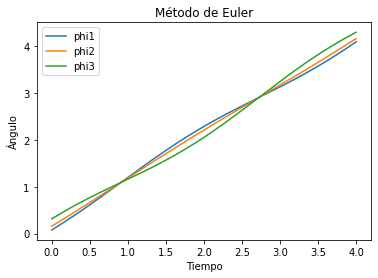

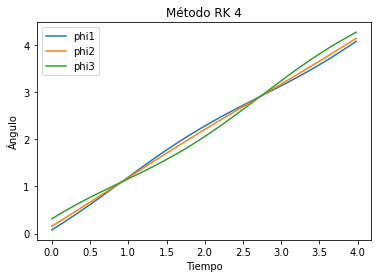

In [5]:
import numpy as np
import matplotlib.pyplot as plt

steps = 300     # número de pasos de tiempo calculados
endtime = 4.0   # fin de la simulación
R=m=k=1

#########################################3
#EULER

# crear matrices 1D de pasos de longitud +1 para tiempo (t), posición (x), velocidad (v)
t = np.zeros(steps+1)
phi1 = np.zeros(steps+1)
phi2 = np.zeros(steps+1)
phi3 = np.zeros(steps+1)
v1 = np.zeros(steps+1)
v2 = np.zeros(steps+1)
v3 = np.zeros(steps+1)

# inicializar variables en el tiempo = 0.0
phi3[0] = np.pi/10.0
phi2[0] = phi3[0]/2
phi1[0] = phi2[0]/2
v1[0] = 1.0
v2[0] = 1.0
v3[0] = 1.0
t[0] = 0.0

dt = endtime / float(steps)
for i in range (steps):
   t[i+1] = t[i] + dt
   phi1[i+1] = phi1[i] + v1[i]*dt
   v1[i+1] = v1[i] +(-k/m*(phi1[i]-phi2[i])-k/m*(phi1[i]-phi3[i]))*dt
   phi2[i+1] = phi2[i] + v2[i]*dt
   v2[i+1] = v2[i] +(-k/m*(phi2[i]-phi3[i])-k/m*(phi2[i]-phi1[i]))*dt
   phi3[i+1] = phi3[i] + v3[i]*dt
   v3[i+1] = v3[i] +(-k/m*(phi3[i]-phi1[i])-k/m*(phi3[i]-phi2[i]))*dt

plt.plot(t, phi1)
plt.plot(t,phi2)
plt.plot(t,phi3)
plt.legend(['phi1','phi2','phi3'])
plt.title('Método de Euler')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

#########################################
# RUNGE KUTTA
# cambio el nombre de las variables phi_i a x,y,z para no confundirme
def f(r,t):
    x,y,z,X,Y,Z = tuple(r)
    fx = X
    fy = Y
    fz = Z
    fX = -k/m*(x-y)-k/m*(x-z)
    fY = -k/m*(y-x)-k/m*(y-z)
    fZ = -k/m*(z-x)-k/m*(z-y)
    return np.array([fx,fy,fz,fX,fY,fZ],float)

N = 200 # no. de puntos
a = 0.0 # tiempo inicial
b = endtime # tiempo final
h = (b-a)/N # divisiones

# inicializar variables en el tiempo = 0.0
r = np.array([np.pi/(10*4),np.pi/(10*2),np.pi/10,1.0,1.0,1.0],float)
phi1points = []
phi2points = []
phi3points = []
tpoints = np.arange(a,b,h)
for t in tpoints:
    phi1points.append(r[0])
    phi2points.append(r[1])
    phi3points.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+1/2*k1,t+1/2*h)
    k3 = h*f(r+1/2*k2,t+1/2*h)
    k4 = h*f(r+k3,t+h)
    r += 1/6*(k1+2*k2+2*k3+k4)

plt.plot(tpoints,phi1points)
plt.plot(tpoints,phi2points)
plt.plot(tpoints,phi3points)
plt.legend(['phi1','phi2','phi3'])
plt.title('Método RK 4')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

Las ecuaciones de Euler Lagrange son
$$\frac{\partial L}{\partial \phi_i}=\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\phi_i}}\right),$$
donde el lagrangiano está dado por
$$L=T-U=\frac{1}{2}mR^2(\dot{\phi_1^2}+\dot{\phi_2^2}+\dot{\phi_3^2})-\frac{1}{2}kR^2 [(\phi_1-\phi_2)^2+(\phi_2-\phi_3)^2+(\phi_3-\phi_1)^2].$$

Observamos que la energía cinética es puramente función de la velocidad angular puesto que el radio es fijo.

Sólo la energía cinética depende de $\dot{\phi_i}$ y sólo la energía potencial depende de $\phi_i$, de donde se obtiene fácilmente que
$$\frac{\partial L}{\partial \phi_1}=-kR^2[(\phi_1-\phi_2)-(\phi_3-\phi_1)]=-kR^2(\phi_1-\phi_2)-kR^2(\phi_1-\phi_3),$$
y análogamente para las otras dos variables. Asimismo,
$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\phi_1}}\right)=mR^2\frac{d}{dt}(\dot\phi_1)=mR^2\frac{d^2 \phi_1}{dt^2}.$$

Por tanto, la ecuación de movimiento es
$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3),$$
y equivalentemente para $\phi_2$ y $\phi_3$:
$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1),$$
$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2).$$

Estas ecuaciones describen la dinámica de la desviación de los ángulos $\phi_i$ a partir de la posición de equilibrio. Inicialmente, perturbamos el sistema de manera que
$$\phi_3(t=0)=\pi/10, \quad \phi_2(t=0)=\pi/20, \quad \phi_1(t=0)=\pi/40,$$
i.e., que el objeto más desviado de su posición de equilibrio es el tercero, mientras que la desviación de los otros dos es igual la mitad y un cuarto respectivamente.

También consideramos que las velocidades iniciales son
$\dot{\phi}_i(t=0)=1$ para los tres objetos. Lo que ambos métodos indican gráficamente es que los tres objetos que conforman el sistema oscilan periódicamente alrededor de una posición de equilibrio. La amplitud del tercero es la más grande, y esto es consecuencia de que sufre la mayor desviación inicial (el sistema de ecuaciones es de hecho simétrico para las tres variables angulares, de modo que habríamos obtenido resultados análogos permutando los valores iniciales). Identificando que $\theta +2\pi$ equivale a $\theta$, cada cierto tiempo el sistema regresa a la posición inicial, lo cual es resultado de la linealidad (pequeños desplazamientos desde la posición de equilibrio).

Si pensamos la solución general como combinación lineal de modos tenemos:

a) La primera solución es una simple rotación, es decir, no hay oscilaciones.
b )En la segunda solución, dos masas oscilan en fase y la tercera con fase opuesta.
c) En la tercera solución una masa es estacionaria mientras que las otras dos masas oscilan con fase opuesta.

Problema 6: (Opcional)

De las sesiones brindadas, su propia experiencia y preferencias: Definir un problema a resolver con el enfoque numérico, explique a detalle cada consideración que realice y explique sus conclusiones. 

El problema puede ser la implementación de un modelo estándar discutido en libros de física (i.e. obtener el gráfico típico de estructura de ionización del átomo de Hidrógeno.), proyecto que esté desarrollando en su formación o complementar cálculos de las sesiones.

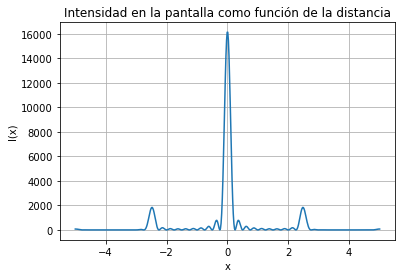

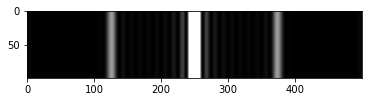

In [6]:
from cmath import exp,sqrt,sin,pi
import matplotlib.pyplot as plt
from numpy import linspace,empty

#d=n*pi/alpha
slit_sep = 20 #mu m
alpha = pi/slit_sep
num_slits = 10
wavelength = 0.5 #mu m
f = 100 #cm de manera que si x se mide en cm x*u/lambda*f es adimensional
#x en cm, u en mu m, lambda en mu m, f en cm
#x va de -10cm a 10cm

def q(u): #u se mide en mu m
   return sin(alpha*u)**2

def integrand(u,x):
    return sqrt(q(u))*exp(1j*2*pi*x*u/(wavelength*f))

# regla del trapezoide
def int_trapezoid(f,x,n):
    a = -(num_slits*slit_sep)/2 #numero de rendijas*separacion de rendijas/2
    b = (num_slits*slit_sep)/2
    N = 2**(n-1)
    h = (b-a)/N
    if n == 1:
        return 0.5*h*(f(a,x)+f(b,x))
    else:
        I = 1/2*int_trapezoid(f,x,n-1)
        for k in range(1,N,2):
            I += h*f(a+k*h,x)
        return I

def I(x):
    return abs(int_trapezoid(integrand,x,12))**2

x_vals = linspace(-5,5,500)
I_vals = list(map(I,x_vals))

plt.title('Intensidad en la pantalla como función de la distancia')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.plot(x_vals,I_vals)
plt.grid(True)
plt.show()

I_array = empty([100, 500], float)
for k in range(100):
    I_array[k, :] = I_vals

plt.imshow(I_array,vmax=3000)
plt.gray()
plt.show()

Para este ejercicio libre decidí resolver el problema 5.19 del libro de Mark Newman http://www-personal.umich.edu/~mejn/cp/exercises.html
Quisiera mencionar que estuve leyendo este libro a la par del curso y algunas cosas las tomé de ahí para resolver estos ejercicios. Por eso tal vez perciban cierta nomenclatura diferente a lo que se vio en clase.

En este problema se estudia la intensidad de luz difractada sobre una pantalla como función de la distancia.
En resumen, el problema da una función (intensidad de difracción) y pide lo siguiente: 

"Use su función en un programa para calcular y graficar la intensidad del patrón de difracción producido por una rejilla que tiene diez rendijas en total, si la luz incidente tiene una longitud de onda
$\lambda = 500 nm$. Suponga que la lente tiene una distancia focal de 1 metro y la pantalla mide $10 cm$ (...) Cree una visualización de cómo se vería el patrón de difracción en la pantalla usando la función imshow"

**Por último, debe de rellenar la siguiente encuesta de satisfacción:** https://forms.gle/4WU3ovvP7gJMj8GA7 (ingresar con el correo que se inscribió).

Enviar sus respuestas a nuestro correo: pythonclubforphysicists@gmail.com

**OJO: El correo debe de tener como asunto:**
**"Ejercicios_IIEVFC"**

*Caso contrario su solución puede quedar sin evaluar debido a la gran cantidad de correos.*


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>